# Exercise 4 - Image Filtering


## Filtering using correlation

In [100]:
import numpy as np
from scipy.ndimage import correlate
import matplotlib.pyplot as plt
import seaborn as sns
#pip install scikit-image
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom
import cv2 as cv
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import skimage as ski
from skimage.filters import median
from skimage.filters import gaussian
from skimage.filters import prewitt_h
from skimage.filters import prewitt_v
from skimage.filters import prewitt

In [27]:
input_img = np.arange(25).reshape(5, 5)
print(input_img)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


In [28]:
weights = [[0, 1, 0],
		   [1, 2, 1],
		   [0, 1, 0]]

In [29]:
res_img = correlate(input_img, weights)

In [30]:
print(res_img)

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]


**Exercise 1**
Print the value in position (3, 3) in res_img. Explain the value?

In [31]:
print(res_img[3,3])
#[x,y] se empieza contando desde el 0

108


### Border handling


**Exercise 2**

In [32]:
res_img_const = correlate(input_img, weights, mode="constant", cval=10)

In [34]:
print(res_img)
print()
print(res_img_const)
# la diferencia esta en los bordes de la matriz
# arriba como no pones nada hace el reflejo del pixel 
# abajo pones un valor contante de 10

[[  6  11  17  23  28]
 [ 31  36  42  48  53]
 [ 61  66  72  78  83]
 [ 91  96 102 108 113]
 [116 121 127 133 138]]

[[ 26  20  25  30  40]
 [ 36  36  42  48  54]
 [ 61  66  72  78  79]
 [ 86  96 102 108 104]
 [ 96 110 115 120 110]]


**Exercise 3**

Read and show the image Gaussian.png from the exercise material.

Create a mean filter with normalized weights:

### Mean filtering 

(450, 450)

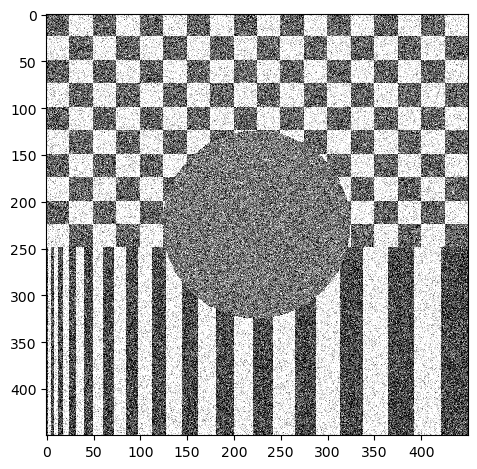

In [64]:
in_dir = "./data"
im_name = "/Gaussian.png"
im_org = io.imread(in_dir + im_name)
gray_image = cv.cvtColor(im_org, cv.COLOR_BGR2GRAY)
io.imshow(gray_image)
gray_image.shape

In [69]:
size = 20
# Two dimensional filter filled with 1
weights = np.ones((size, size))
# Normalize weights (1/25-->suma de todos los 1)
weights /= np.sum(weights)

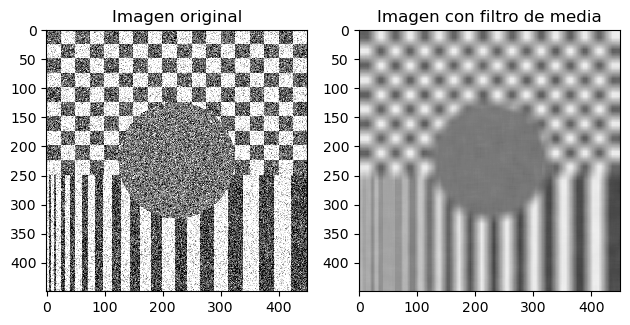

In [70]:
# Apply the filter to the image
filtered_image = correlate(gray_image, weights)

# Display the original image and the filtered image
plt.figure()
plt.subplot(121)
io.imshow(gray_image, cmap='gray')
plt.title("Imagen original")

plt.subplot(122)
io.imshow(filtered_image, cmap='gray')
plt.title("Imagen con filtro de media")

plt.show()


### Median

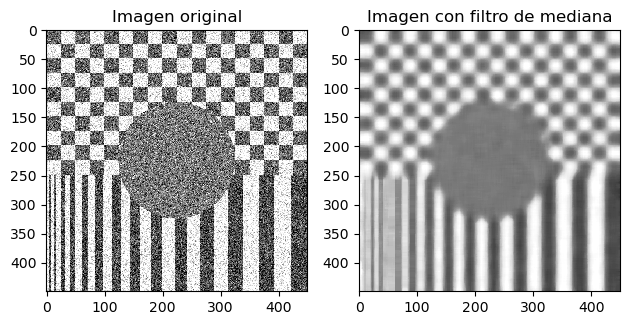

In [71]:
size = 20
footprint = np.ones([size, size])
med_img = median(gray_image, footprint)

plt.figure()
plt.subplot(121)
io.imshow(gray_image, cmap='gray')
plt.title("Imagen original")

plt.subplot(122)
io.imshow(med_img, cmap='gray')
plt.title("Imagen con filtro de mediana")

plt.show()

mientras mas sube el valor dle filtro de media/mediana, mas blurry hay en la foto

### Comparing mean and median filtering

Try to load and show the SaltPepper.png image. This image has noise consist of very dark or very light pixels.

**Exercise 5**
Try to use your mean and median filter with different filter sizes on the SaltPepper.png. What do you observe? Can they remove the noise and what happens to the image?

(450, 450)

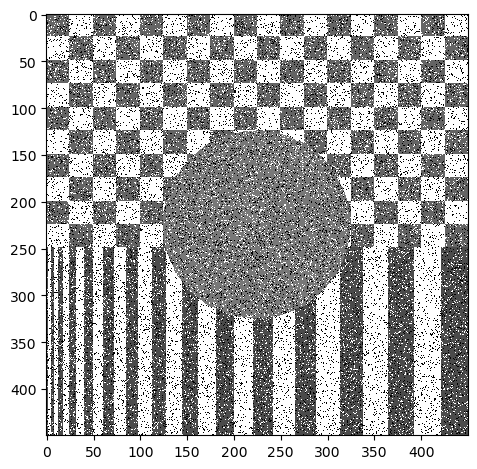

In [72]:
in_dir = "./data"
im_name = "/SaltPepper.png"
im_org = io.imread(in_dir + im_name)
gray_image = cv.cvtColor(im_org, cv.COLOR_BGR2GRAY)
io.imshow(gray_image)
gray_image.shape

In [73]:
size = 5
# Two dimensional filter filled with 1
weights = np.ones((size, size))
# Normalize weights (1/25-->suma de todos los 1)
weights /= np.sum(weights)

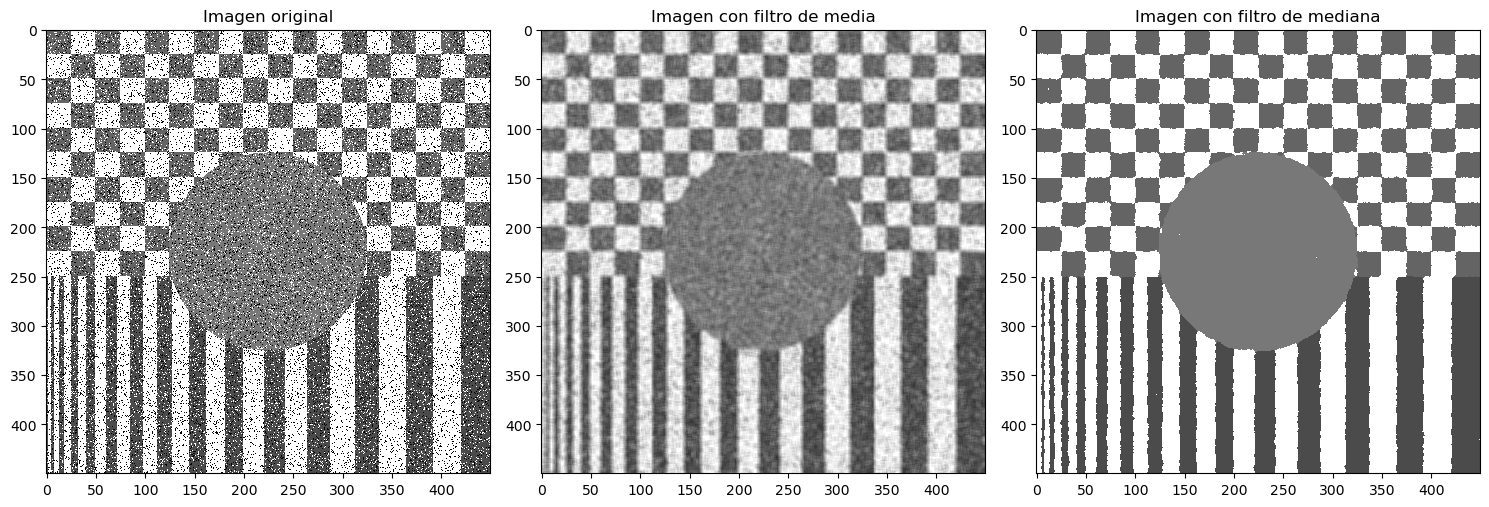

In [80]:
# Apply the filter to the image
filtered_image = correlate(gray_image, weights)

#mediana
size = 4
footprint = np.ones([size, size])
med_img = median(gray_image, footprint)

# Display the original image and the filtered image
plt.figure(figsize=(15,6))
plt.subplot(131)
io.imshow(gray_image, cmap='gray')
plt.title("Imagen original")

plt.subplot(132)
io.imshow(filtered_image, cmap='gray')
plt.title("Imagen con filtro de media")

plt.subplot(133)
io.imshow(med_img, cmap='gray')
plt.title("Imagen con filtro de mediana")

plt.show()

### Gaussian filter


Scikit-image contains many different filters.

The Gaussian filter is widely used in image processing. It is a smoothing filter that removes high frequencies from the image.

**Exercise 6**

Let us try the Gaussian filter on the Gaussian.png image. Start by importing the filter:

C:\Users\Usuario\AppData\Local\Temp\ipykernel_25788\1135425830.py:2: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.22. Set `channel_axis=-1` explicitly to silence this warning.
  gauss_img = gaussian(im_org, sigma)


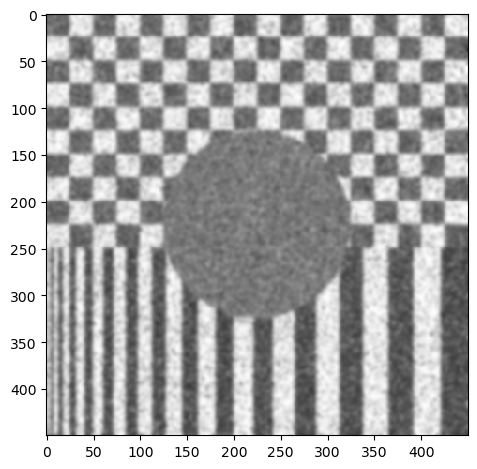

In [87]:
sigma = 2
gauss_img = gaussian(im_org, sigma)
io.imshow(gauss_img)

**Exercise 7**
Use one of your images (or use the car.png image) to try the above filters. Especially, try with large filter kernels (larger than 10) with the median and the Gaussian filter. Remember to transform your image into gray-scale before filtering.

What is the visual difference between in the output? Try to observe places where there is clear light-dark transition.

(647, 800)

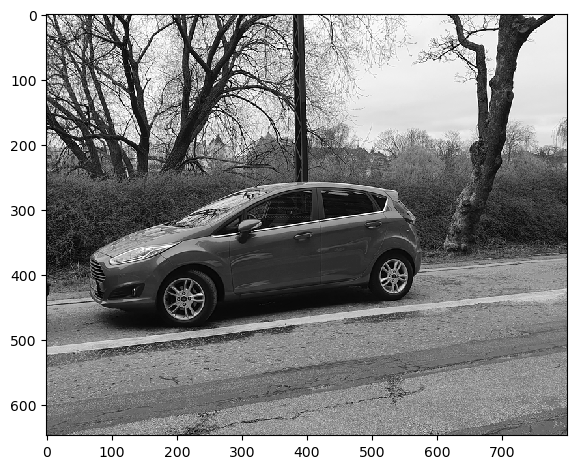

In [90]:
in_dir = "./data"
im_name = "/car.png"
im_org = io.imread(in_dir + im_name)
im_car_gray = cv.cvtColor(im_org, cv.COLOR_BGR2GRAY)
io.imshow(im_car_gray)
im_car_gray.shape

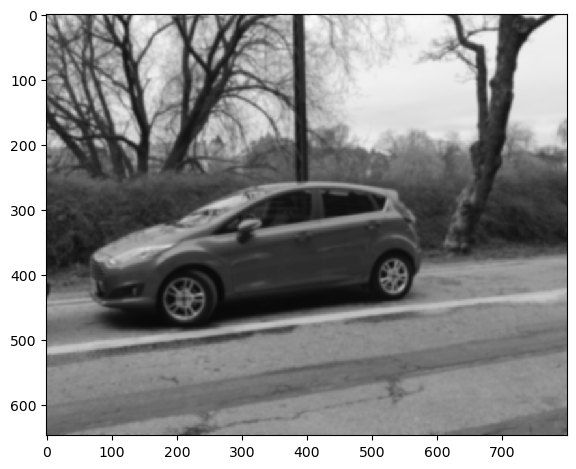

In [96]:
sigma = 2
gauss_img = gaussian(im_car_gray, sigma)
io.imshow(gauss_img)

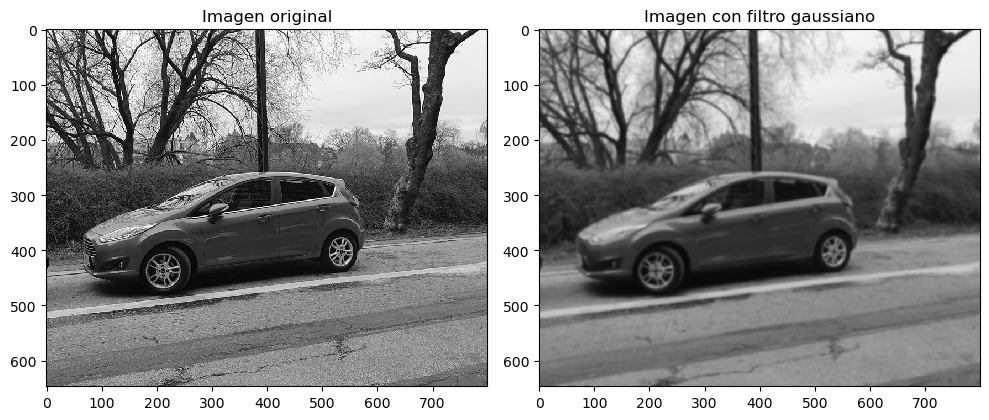

In [99]:
plt.figure(figsize=(10,5))
plt.subplot(121)
io.imshow(im_car_gray, cmap='gray')
plt.title("Imagen original")

plt.subplot(122)
io.imshow(gauss_img, cmap='gray')
plt.title("Imagen con filtro gaussiano")

plt.show()

###  Edge filters

**Exercise 8**
Try to filter the donald_1.png photo with the prewitt_h and prewitt_v filters and show the output without converting the output to unsigned byte. Notice that the output range is [-1, 1]. Try to explain what features of the image that gets high and low values when using the two filters?

(500, 500)

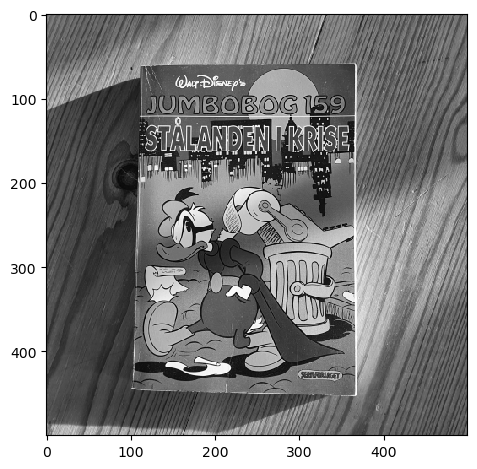

In [102]:
in_dir = "./data"
im_name = "/donald_1.png"
im_org = io.imread(in_dir + im_name)
im_donald = cv.cvtColor(im_org, cv.COLOR_BGR2GRAY)
io.imshow(im_donald)
im_donald.shape

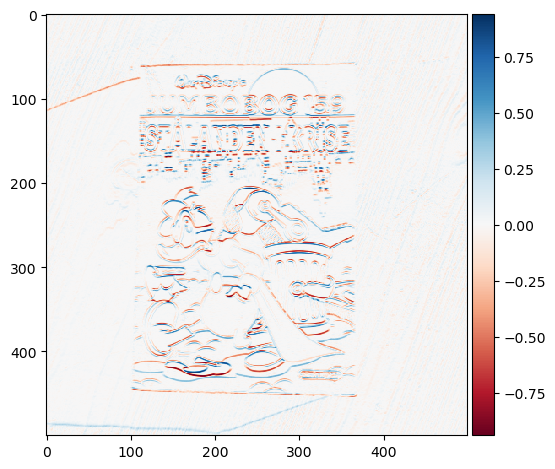

In [104]:
hor_edg = prewitt_h(im_donald)
io.imshow(hor_edg)

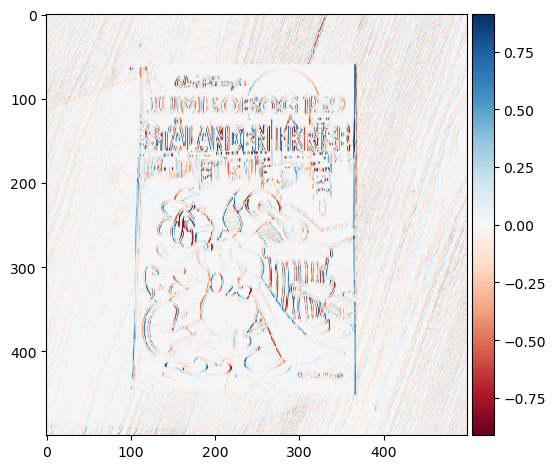

In [105]:
ver_edg = prewitt_v(im_donald)
io.imshow(ver_edg)

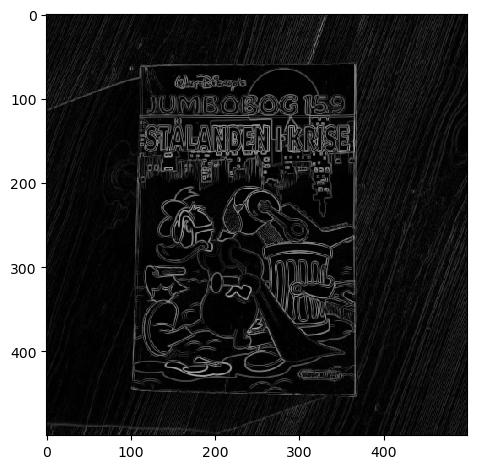

In [107]:
edg = prewitt(im_donald)
io.imshow(edg)
#prewitt coge todos los bordes de la imagen da igual la orientacion

### Edge detection in medical images


**Exercise 10**

The goal of this exercise is to detect the edges that seperates the bone from the soft tissue and the edges that separates the elbow from the background. Your detection algorithm should follow this outline:

- Read the CT image
- Filter the image using either a Gaussian filter or a median filter
- Compute the gradients in the filtered image using a Prewitt filter
- Use Otsu's thresholding method to compute a threshold, T, in the gradient image
- Apply the threshold, T, to the gradient image to create a binary image.

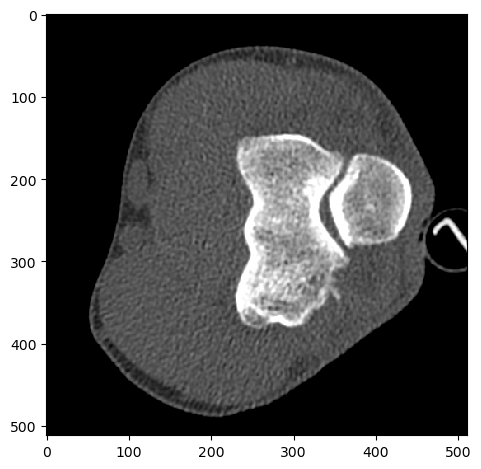

In [126]:
in_dir = "./data"
im_name = "/ElbowCTSlice.png"
im_org = io.imread(in_dir + im_name)
elbow_im = cv.cvtColor(im_org, cv.COLOR_BGR2GRAY)
io.imshow(elbow_im)

In [175]:
def elbow_detection(img):
    # First step: gaussian filter
    sigma = 1.5
    gauss_img = gaussian(img, sigma)

    # size = 20
    # footprint = np.ones([size, size])
    # med_img = median(gray_image, footprint)
    
    # Second step: compute the gradients
    edg = prewitt(gauss_img)
    
    # Convert the gradient image to 8-bit grayscale
    edg = (edg * 255).astype(np.uint8)
    
    # Apply the Otsu threshold
    ret2, th2 = cv2.threshold(edg, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #plot
    plt.figure(figsize=(15,4))
    plt.subplot(141)
    plt.title("Foto original")
    io.imshow(img)
    
    plt.subplot(142)
    io.imshow(gauss_img)
    plt.title("Foto filtro gaussiano")
    
    plt.subplot(143)
    io.imshow(edg, cmap='gray')
    plt.title("Foto filtro gradientes prewitt")
    
    plt.subplot(144)
    io.imshow(th2, cmap='gray')
    plt.title("Foto de prewitt con método Otsu")
    
    plt.show()
    
    
    min_val = th2.min()
    max_val = th2.max()
    io.imshow(th2, vmin=min_val, vmax=max_val, cmap="terrain")

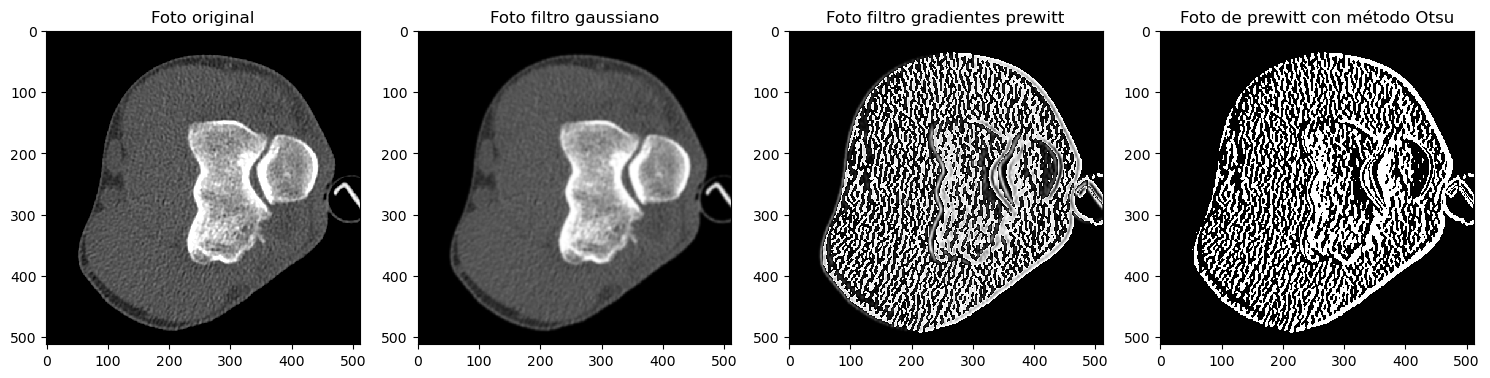

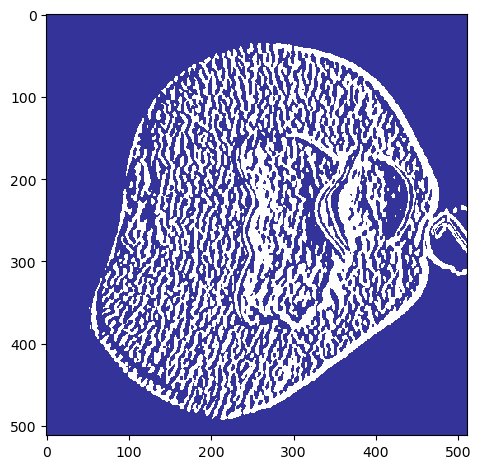

In [176]:
elbow_detection(elbow_im)

los ejercicios siguientes son de camaras en tiempo real, dudo que la pidan en el examen



RESULETOS EN EL ARCHIVO .py DE /data